## Ejercicio de Aprendizaje No Supervisado
## K-MENANS
## Iván Andrés Olave Ramírez

In [20]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Lectura de Datos en Phyton y lo cargamos en la variable Datos

Datos= pd.read_csv('C:/Users/Usuario/Documents/PERSONAL/INGENIERIA DE SISTEMAS/VI SEMESTRE/Análisis de Datos/Tarea 4/Mall_Customers.csv')

In [22]:
Datos.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
95,96,Male,24,60,52
96,97,Female,47,60,47
97,98,Female,27,60,50
98,99,Male,48,61,42


In [23]:
Datos.shape

(200, 5)

In [24]:
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [25]:
# Valores Nulos

Datos.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [26]:
#Eliminar valores nulos

Datos.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


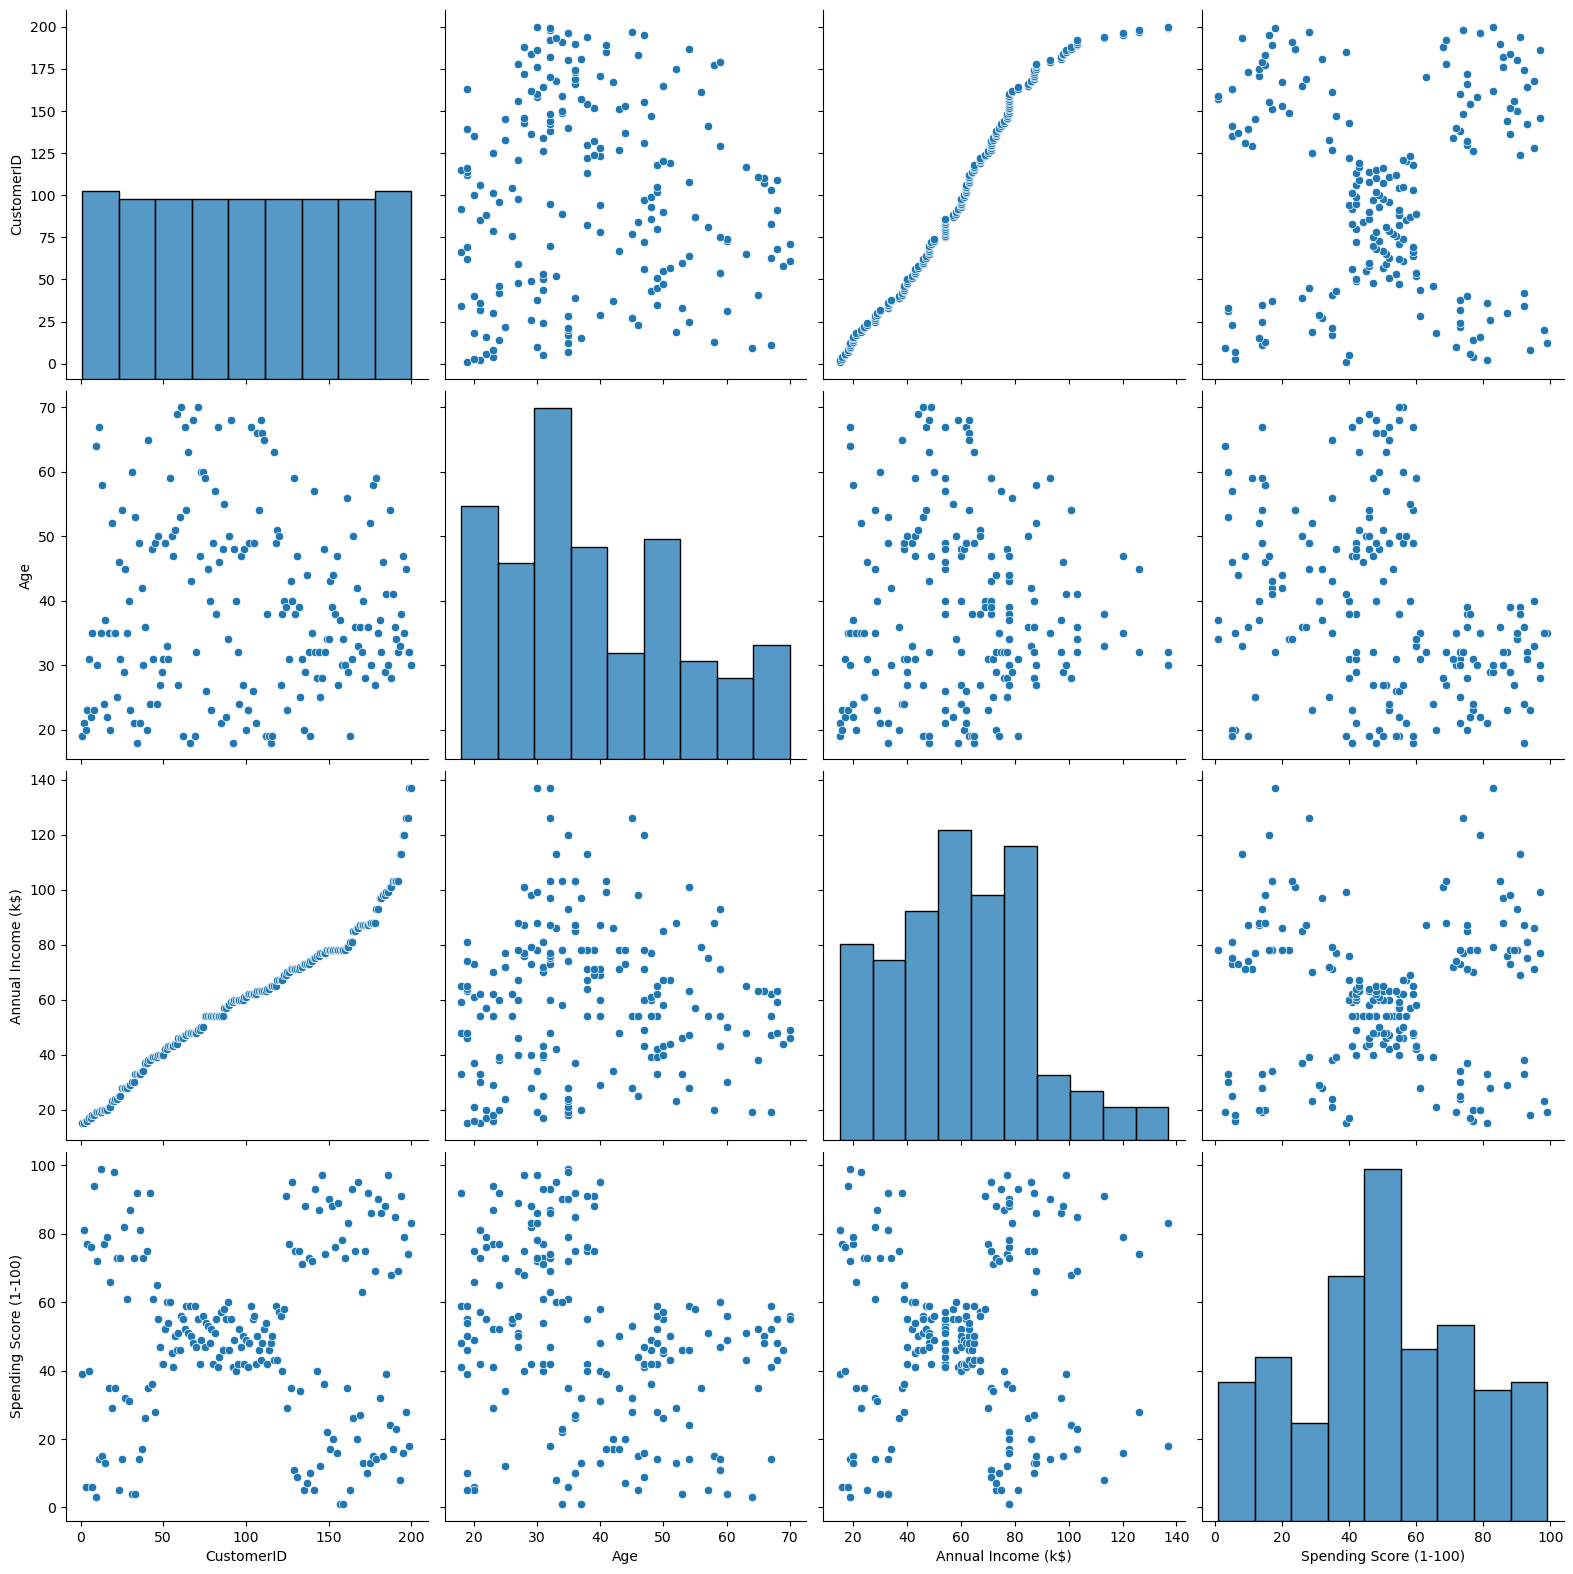

In [27]:
# Diagrama de Dispersión
sns.pairplot(Datos.dropna(), size=4,kind='scatter')

In [28]:
#Matriz de Correlación
#Solo con columnas numéricas; excluimos la columna Gender

corr_matrix = Datos.select_dtypes(include='number').corr()
corr_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


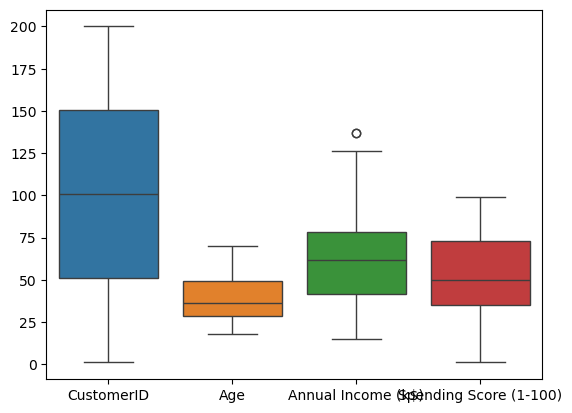

In [29]:
#Diagrama de Caja para cada variable

sns.boxplot(data=Datos)
plt.show()

In [30]:
# 1. Separar columnas numéricas y no numéricas
numericas = Datos.select_dtypes(include='number')
no_numericas = Datos.select_dtypes(exclude='number')

# 2. Aplicar StandardScaler solo a las columnas numéricas
scaler = StandardScaler()
numericas_escaladas = pd.DataFrame(scaler.fit_transform(numericas), columns=numericas.columns, index=Datos.index)

# 3. Unir de nuevo columnas no numéricas con las columnas escaladas
X = pd.concat([numericas_escaladas, no_numericas], axis=1)

# 4. Mostrar el resultado
X.head(100)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.723412,-1.424569,-1.738999,-0.434801,Male
1,-1.706091,-1.281035,-1.738999,1.195704,Male
2,-1.688771,-1.352802,-1.700830,-1.715913,Female
3,-1.671450,-1.137502,-1.700830,1.040418,Female
4,-1.654129,-0.563369,-1.662660,-0.395980,Female
...,...,...,...,...,...
95,-0.077943,-1.065735,-0.021375,0.069879,Male
96,-0.060623,0.584899,-0.021375,-0.124229,Female
97,-0.043302,-0.850435,-0.021375,-0.007764,Female
98,-0.025981,0.656665,0.016795,-0.318337,Male


## K-MEANS

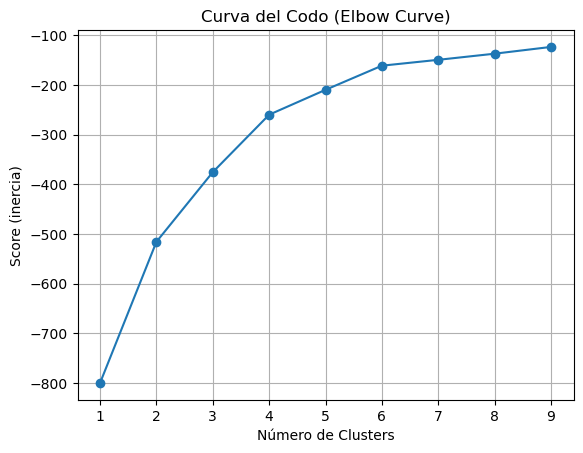

In [32]:
# Asegurar que usamos solo columnas numéricas
X_numerico = X.select_dtypes(include='number')

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i, random_state=42) for i in Nc]
score = [kmeans[i].fit(X_numerico).score(X_numerico) for i in range(len(kmeans))]

# Graficar la curva del codo
plt.plot(Nc, score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score (inercia)')
plt.title('Curva del Codo (Elbow Curve)')
plt.grid(True)
plt.show()

In [33]:
X_numerico = X.select_dtypes(include='number')

# Ajustar KMeans con 3 clústeres
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_numerico)

# Obtener los centroides
centroids = kmeans.cluster_centers_

# Mostrar los centroides
print("Centroides de los clústeres:")
print(centroids)

Centroides de los clústeres:
[[-0.47192101  1.13852727 -0.42245682 -0.37379617]
 [ 0.94955398 -0.31837188  0.88854921  0.06363166]
 [-1.05760344 -0.88057728 -1.01378004  0.36026408]]


In [34]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 

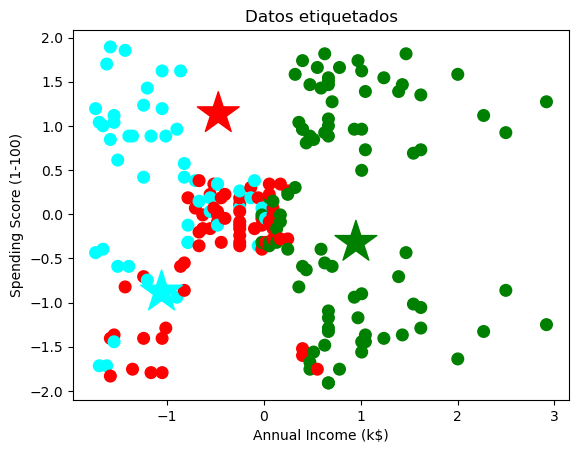

In [35]:
# Gráfica Annual Income (k$) vs Speding Score (1 - 100)
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

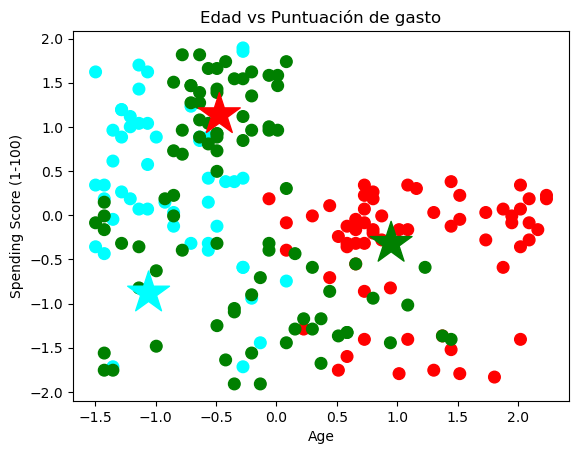

In [36]:
# Gráfica Age vs Spending Score (1 -100)

f1 = X['Age'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Edad vs Puntuación de gasto')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

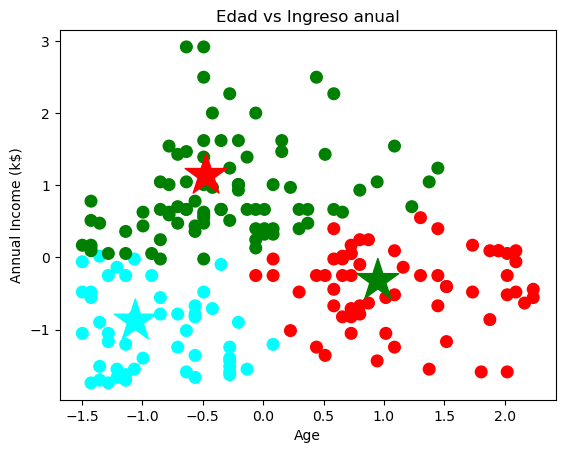

In [54]:
# Gráfica Age vs Annual Income (k$)

f1 = X['Age'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Edad vs Ingreso anual')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

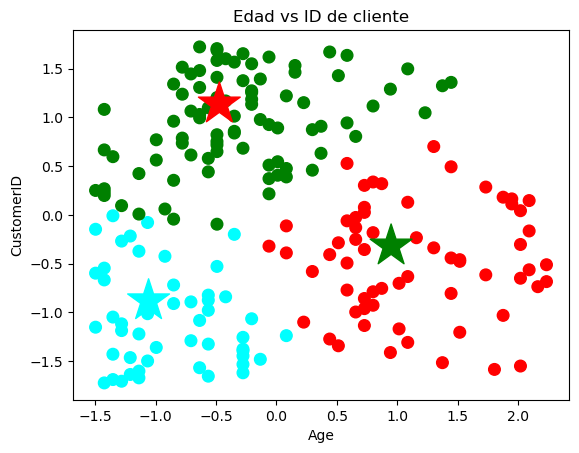

In [56]:
# Gráfica Age vs CustomerID

f1 = X['Age'].values
f2 = X['CustomerID'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Edad vs ID de cliente')
plt.xlabel('Age')
plt.ylabel('CustomerID')
plt.show()

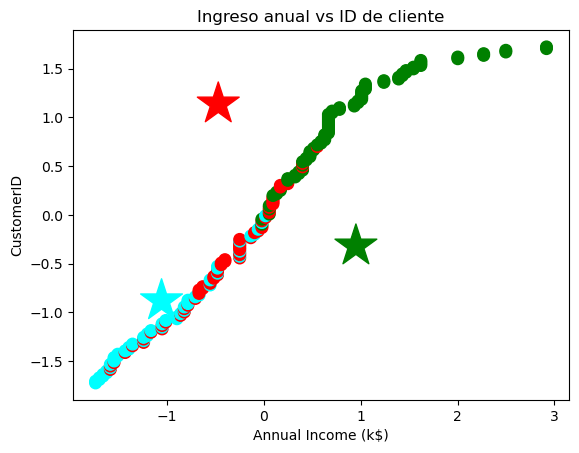

In [58]:
# Gráfica Annual Income (k$) vs CustomerID

f1 = X['Annual Income (k$)'].values
f2 = X['CustomerID'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Ingreso anual vs ID de cliente')
plt.xlabel('Annual Income (k$)')
plt.ylabel('CustomerID')
plt.show()

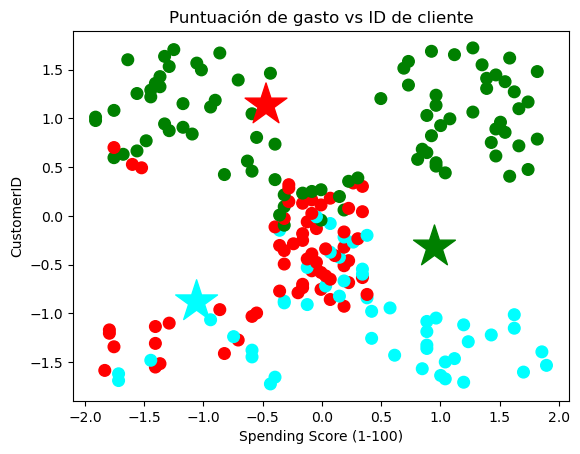

In [60]:
# Spending Score (1 - 100) vs CustoerID

f1 = X['Spending Score (1-100)'].values
f2 = X['CustomerID'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Puntuación de gasto vs ID de cliente')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('CustomerID')
plt.show()

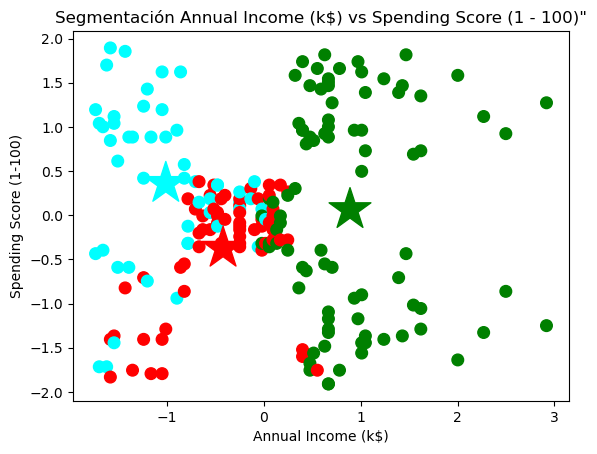

In [74]:
# Segmentación Tipo Pétalos: Annual Income (k$) vs Spending Score (1 - 100)

f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 2], C[:, 3], marker='*', c=colores, s=1000)
plt.title('Segmentación Annual Income (k$) vs Spending Score (1 - 100)"')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

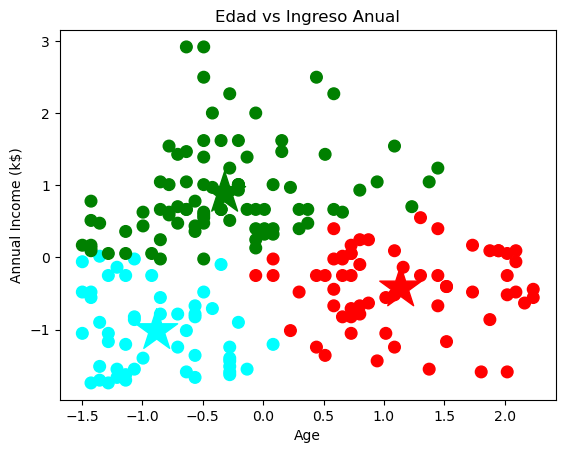

In [70]:
# Segmentación Tipo Pétalos: Age vs Annual Income (k$)
f1 = X['Age'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.title('Segmentación Edad vs Ingreso Anual')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()


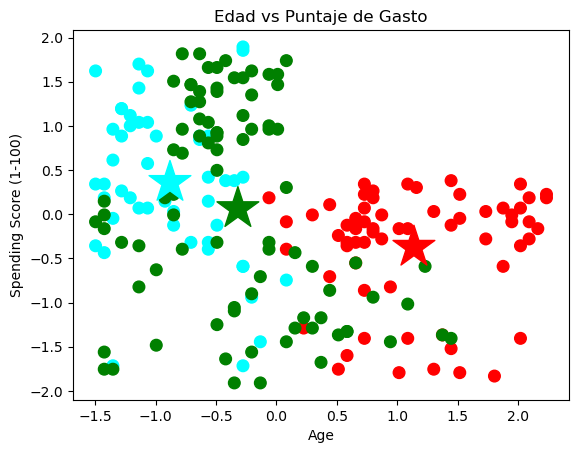

In [78]:
# Segmentación Tipo Pétalos: Age vs Spending Score
f1 = X['Age'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 3], marker='*', c=colores, s=1000)
plt.title('Edad vs Puntaje de Gasto')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [82]:
X_new = scaler.fit_transform(np.array([[100,40,65.55,55.00]]))  
new_label = kmeans.predict(X_new)
color=[]
for row in new_label:
    color.append(colores[row])    
print(new_label)
print(color)

[1]
['green']


In [87]:
X_sin_genero = X.drop(['Gender'], axis=1)

In [89]:
#Calcular Medidas para K-Means

print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X_sin_genero, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X_sin_genero, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X_sin_genero, labels))


Medidas de calidad para K-Means:
Puntaje de silueta: 0.3371428082096961
Índice de Calinski-Harabasz: 111.41893069407618
Inertia (suma de cuadrados dentro de los clusters): 375.38300971453884
Davies-Bouldin Index: 1.0258453535103749


In [91]:
# Comparación con Dos 2 Clústers: Resultados

X_numerico = X.select_dtypes(include='number')

# Ajustar KMeans con 2 clústeres
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_numerico)

# Obtener los centroides
centroids = kmeans.cluster_centers_

# Mostrar los centroides
print("Centroides de los clústeres:")
print(centroids)

Centroides de los clústeres:
[[-0.81102231  0.24178539 -0.75495496 -0.00924323]
 [ 0.89639308 -0.26723649  0.8344239   0.0102162 ]]


In [93]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 

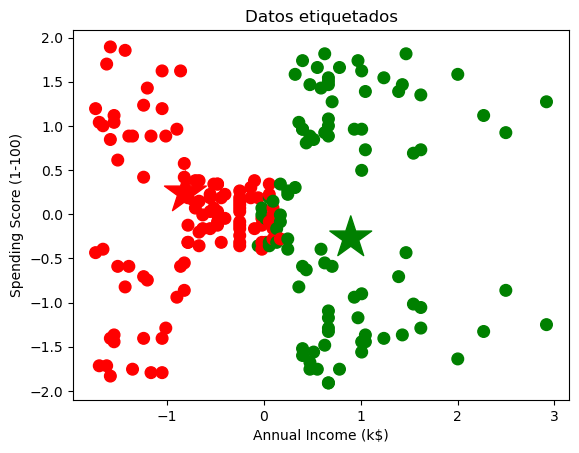

In [96]:
# Gráfica Annual Income (k$) vs Speding Score (1 - 100)
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [98]:
#Calcular Medidas para K-Means

print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X_sin_genero, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X_sin_genero, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X_sin_genero, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.3185134408711024
Índice de Calinski-Harabasz: 109.1738538838127
Inertia (suma de cuadrados dentro de los clusters): 515.668889123337
Davies-Bouldin Index: 1.277542402230736
